In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
labels = np.uint8(np.loadtxt("label.txt"))
video_read = cv2.VideoCapture("test_dataset.avi")

video = []

while True:
    success, image = video_read.read()
    
    if not success:
        break
        
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    video.append(image)

In [25]:
data = np.array(video).reshape((len(video), -1))
x_train,x_test,y_train,y_test = train_test_split(data, labels , train_size = 0.7, random_state = 123)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [2 1 0 ... 4 4 4]
 [0 0 0 ... 0 0 0]
 [0 1 2 ... 0 0 0]]


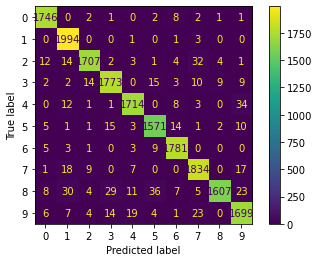

In [26]:
x_test = np.array(x_test)
print(x_test)
y_test = np.array(y_test).reshape(-1 ,1)
plot_confusion_matrix(knn ,x_test,y_test)
plt.show()

In [30]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1763
           1       0.96      1.00      0.98      1999
           2       0.98      0.96      0.97      1780
           3       0.97      0.97      0.97      1837
           4       0.97      0.97      0.97      1773
           5       0.96      0.97      0.96      1623
           6       0.97      0.99      0.98      1802
           7       0.96      0.97      0.97      1886
           8       0.99      0.91      0.95      1760
           9       0.95      0.96      0.95      1777

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000



In [37]:
print(knn.score(x_test,y_test))

0.9681111111111111
